In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split


# Load the data

In [36]:
data = pd.read_csv('speeddating.csv', encoding='ISO-8859-1')

In [37]:
# Extract the relevant features and drop missing values
X = data[['attractive','ambition', 'funny', 'intelligence', 'sincere', 'age_o', 'expected_happy_with_sd_people','ambtition_important', 'pref_o_funny']].dropna().values

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=0, shuffle=True)

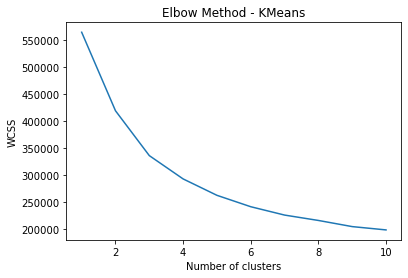

In [38]:
# Perform KMeans clustering and elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method - KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_test)

In [40]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=2)
y_dbscan = dbscan.fit_predict(X_test)

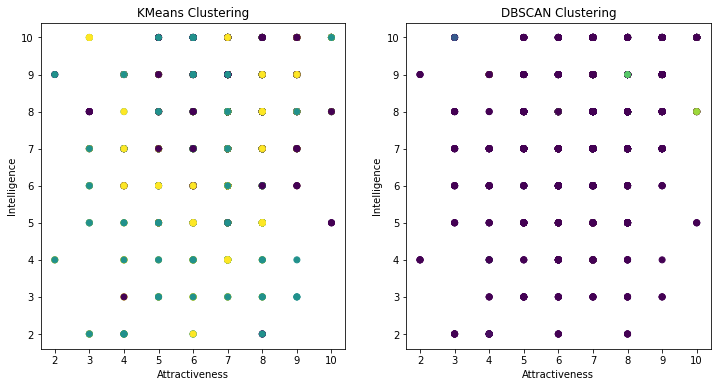

In [41]:
# Plot the results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Attractiveness')
plt.ylabel('Intelligence')
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Attractiveness')
plt.ylabel('Intelligence')
plt.show()


In [42]:
# Calcular las medias de cada cluster
cluster_means = []
for i in range(3):
    cluster_means.append(X_test[y_kmeans == i].mean(axis=0))



# Mostrar los componentes con los valores más altos para cada cluster
for i in range(3):
    print(f"Cluster {i+1}:")
    sorted_indices = np.argsort(cluster_means[i])[::-1]
    for j in range(3):
        feature_index = sorted_indices[j]
        feature_value = cluster_means[i][feature_index]
        print(f"  {feature_index}: {feature_value}")


Cluster 1:
  5: 26.876975169300227
  8: 18.19618510158012
  7: 16.665812641083523
Cluster 2:
  5: 26.733860342555996
  8: 11.495191040843215
  2: 8.38076416337286
Cluster 3:
  5: 25.682337992376112
  8: 22.535933926302402
  2: 8.432020330368488


In [43]:
# Calcular la varianza de cada cluster
cluster_variances = []
for i in range(3):
    cluster_variances.append(np.var(X_test[y_kmeans == i], axis=0))


# Mostrar las características con las varianzas más altas para cada cluster
for i in range(3):
    print(f"Cluster {i+1}:")
    sorted_indices = np.argsort(cluster_variances[i])[::-1]
    for j in range(3):
        feature_index = sorted_indices[j]
        feature_variance = cluster_variances[i][feature_index]
        print(f"  {feature_index}: {feature_variance}")


Cluster 1:
  5: 14.807663988096758
  8: 14.57256445332202
  7: 12.231958651126837
Cluster 2:
  7: 21.1611166193643
  5: 14.490434504870048
  8: 14.355686096573374
Cluster 3:
  8: 27.585781688137274
  7: 17.471284615471454
  5: 10.669103555392686


In [44]:
# Calcular la media de cada cluster
cluster_means = kmeans.cluster_centers_

# Recopilar los 5 elementos más cercanos a cada centroide
closest_points = [[] for i in range(3)]
distances = kmeans.transform(X_test)
for i in range(len(X_test)):
    closest_cluster = np.argmin(distances[i])
    if len(closest_points[closest_cluster]) < 5:
        closest_points[closest_cluster].append(X_test[i])



# Mostrar las características con las varianzas más altas para cada cluster
for i in range(3):
    print(f"Cluster {i+1}:")
    sorted_indices = np.argsort(cluster_variances[i])[::-1]
    for j in range(3):
        feature_index = sorted_indices[j]
    
        feature_variance = cluster_variances[i][feature_index]
        print(f"  {feature_index}: {feature_variance}")
    print("  Closest points:")
    for point in closest_points[i]:
        print("    ", end="")
        for j in range(len(point)):
            print(f"{feature_names[j]}={point[j]:.2f}", end=" ")
        print()


Cluster 1:
  5: 14.807663988096758
  8: 14.57256445332202
  7: 12.231958651126837
  Closest points:
    6.0=5.00 7.0=7.00 8.0=7.00 8.0=5.00 8.0=8.00 27.0=32.00 3.0=5.00 15.0=15.00 20.0=15.00 
    6.0=9.00 7.0=9.00 8.0=9.00 8.0=8.00 8.0=9.00 27.0=34.00 3.0=6.00 15.0=18.87 20.0=16.67 
    6.0=8.00 7.0=9.00 8.0=9.00 8.0=9.00 8.0=9.00 27.0=27.00 3.0=7.00 15.0=17.31 20.0=20.00 
    6.0=5.00 7.0=9.00 8.0=7.00 8.0=7.00 8.0=9.00 27.0=29.00 3.0=4.00 15.0=15.00 20.0=20.00 
    6.0=7.00 7.0=9.00 8.0=9.00 8.0=8.00 8.0=9.00 27.0=26.00 3.0=7.00 15.0=15.00 20.0=15.00 
Cluster 2:
  7: 21.1611166193643
  5: 14.490434504870048
  8: 14.355686096573374
  Closest points:
    6.0=9.00 7.0=9.00 8.0=9.00 8.0=9.00 8.0=9.00 27.0=26.00 3.0=5.00 15.0=10.00 20.0=16.67 
    6.0=7.00 7.0=8.00 8.0=7.00 8.0=9.00 8.0=8.00 27.0=24.00 3.0=1.00 15.0=10.00 20.0=0.00 
    6.0=6.00 7.0=8.00 8.0=10.00 8.0=6.00 8.0=3.00 27.0=24.00 3.0=7.00 15.0=10.00 20.0=0.00 
    6.0=8.00 7.0=9.00 8.0=9.00 8.0=9.00 8.0=2.00 27.0=31.00 3.0=8.